In [36]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [13]:
!pwd

/Users/slava/temp


In [9]:
!ls cats_and_dogs_filtered/

train        validation   vectorize.py


In [10]:
train_dir = "/Users/slava/temp/cats_and_dogs_filtered/train/"
valid_dir = "/Users/slava/temp/cats_and_dogs_filtered/validation/"

In [11]:
BATCH_SIZE = 50
IMG_SHAPE  = 150

In [22]:
train_image_generator      = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [28]:
train_data_gen = train_image_generator.flow_from_directory(train_dir, 
                                          target_size=(IMG_SHAPE, IMG_SHAPE), 
                                          class_mode="binary",
                                          batch_size=BATCH_SIZE
                                         )

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [29]:
sample_train_data_gen, sample_labels = next(train_data_gen)

In [50]:
sample_train_data_gen[0]

array([[[0.90196085, 0.8078432 , 0.8000001 ],
        [0.8980393 , 0.78823537, 0.7843138 ],
        [0.909804  , 0.7568628 , 0.7686275 ],
        ...,
        [0.94117653, 0.6745098 , 0.6784314 ],
        [0.9607844 , 0.68235296, 0.69803923],
        [0.92549026, 0.6745098 , 0.6666667 ]],

       [[0.85098046, 0.7411765 , 0.7372549 ],
        [0.8862746 , 0.7607844 , 0.76470596],
        [0.9450981 , 0.7803922 , 0.7960785 ],
        ...,
        [0.9215687 , 0.68235296, 0.6784314 ],
        [0.909804  , 0.6666667 , 0.67058825],
        [0.9215687 , 0.67058825, 0.67058825]],

       [[0.882353  , 0.7294118 , 0.7411765 ],
        [0.93725497, 0.7725491 , 0.78823537],
        [0.97647065, 0.7843138 , 0.8078432 ],
        ...,
        [0.9333334 , 0.72156864, 0.7137255 ],
        [0.909804  , 0.72156864, 0.7137255 ],
        [0.94117653, 0.7019608 , 0.69803923]],

       ...,

       [[0.21568629, 0.03921569, 0.01960784],
        [0.20000002, 0.04705883, 0.01960784],
        [0.18431373, 0

Text(0.5, 1.0, 'Dog')

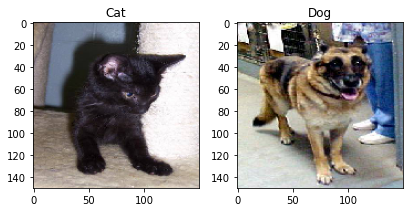

In [73]:
plt.figure(figsize=(14,14))
plt.subplot(4,4, 1)
plt.imshow(sample_train_data_gen[11])
plt.title('Cat')
plt.subplot(4,4, 2)
plt.imshow(sample_train_data_gen[10])
plt.title('Dog')

In [75]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [77]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=['accuracy'])

In [78]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 128)       204928    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)            

In [81]:
EPOCHS = 20
history = model.fit(
    train_data_gen,
    epochs=EPOCHS,
    validation_data=valid_data_gen)

Epoch 1/20
40/40 [==============================] - 77s 2s/step - loss: 0.6918 - accuracy: 0.5275 - val_loss: 0.6907 - val_accuracy: 0.5015
Epoch 2/20
40/40 [==============================] - 87s 2s/step - loss: 0.6896 - accuracy: 0.5240 - val_loss: 0.6819 - val_accuracy: 0.5780
Epoch 3/20
40/40 [==============================] - 80s 2s/step - loss: 0.6703 - accuracy: 0.5835 - val_loss: 0.6436 - val_accuracy: 0.6265
Epoch 4/20
40/40 [==============================] - 75s 2s/step - loss: 0.6459 - accuracy: 0.6120 - val_loss: 0.6092 - val_accuracy: 0.6565
Epoch 5/20
40/40 [==============================] - 74s 2s/step - loss: 0.6446 - accuracy: 0.6390 - val_loss: 0.6084 - val_accuracy: 0.6560
Epoch 6/20
40/40 [==============================] - 74s 2s/step - loss: 0.5859 - accuracy: 0.6870 - val_loss: 0.5820 - val_accuracy: 0.6855
Epoch 7/20
40/40 [==============================] - 74s 2s/step - loss: 0.5773 - accuracy: 0.7040 - val_loss: 0.5464 - val_accuracy: 0.7160
Epoch 8/20
40/40 [==

In [82]:
valid_data_gen = validation_image_generator.flow_from_directory(train_dir, 
                                               target_size=(IMG_SHAPE, IMG_SHAPE), 
                                               class_mode="binary",
                                               batch_size=BATCH_SIZE
                                               )

Found 2000 images belonging to 2 classes.


In [83]:
sample_validation_images, sample_validation_labels = next(valid_data_gen)
predicted = model.predict(sample_validation_images).flatten()

/Users/slava/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [97]:
sample_validation_images

array([[[[0.47450984, 0.39607847, 0.15686275],
         [0.454902  , 0.37647063, 0.13725491],
         [0.46274513, 0.38431376, 0.14509805],
         ...,
         [0.7294118 , 0.627451  , 0.3372549 ],
         [0.74509805, 0.6431373 , 0.3529412 ],
         [0.74509805, 0.6431373 , 0.3529412 ]],

        [[0.4666667 , 0.38823533, 0.14901961],
         [0.45098042, 0.37254903, 0.13333334],
         [0.4666667 , 0.38823533, 0.14901961],
         ...,
         [0.7490196 , 0.64705884, 0.35686275],
         [0.74509805, 0.6431373 , 0.3529412 ],
         [0.74509805, 0.6431373 , 0.3529412 ]],

        [[0.48627454, 0.40784317, 0.16862746],
         [0.46274513, 0.38431376, 0.14509805],
         [0.46274513, 0.38431376, 0.14509805],
         ...,
         [0.7490196 , 0.64705884, 0.35686275],
         [0.7372549 , 0.63529414, 0.34509805],
         [0.7372549 , 0.63529414, 0.34509805]],

        ...,

        [[0.10588236, 0.07843138, 0.05490196],
         [0.10588236, 0.07843138, 0.05490196]

In [116]:
sample_validation_labels = sample_validation_labels.astype("int32")
sample_validation_labels

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [91]:
predicted

array([9.9999940e-01, 2.0837784e-03, 9.7018766e-01, 1.5170276e-03,
       9.9999398e-01, 3.1539999e-05, 3.7272104e-12, 3.2484233e-03,
       2.6056470e-05, 9.9923372e-01, 9.9997675e-01, 8.1688076e-02,
       3.4502149e-04, 2.5234884e-01, 2.9284713e-01, 9.9351925e-01,
       9.7568154e-01, 3.2255390e-05, 9.9996710e-01, 9.9999928e-01,
       9.6293485e-01, 4.8050880e-03, 3.0830613e-06, 5.6986510e-06,
       1.4836192e-03, 8.1576705e-03, 2.5075752e-01, 9.9980974e-01,
       9.9882281e-01, 3.7041223e-01, 3.2129258e-02, 1.4807290e-01,
       7.6845795e-02, 4.3767872e-05, 4.5053750e-02, 7.0905644e-01,
       8.2378799e-01, 1.0000000e+00, 5.1729977e-03, 9.0447044e-01,
       8.0188198e-05, 4.9993098e-03, 1.7684698e-04, 8.8375807e-04,
       9.9992222e-01, 9.9919236e-01, 9.6800911e-01, 8.4415138e-01,
       9.9999005e-01, 9.9645936e-01], dtype=float32)

In [117]:
predicted = (predicted > 0.5).astype("int32")
predicted

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1], dtype=int32)

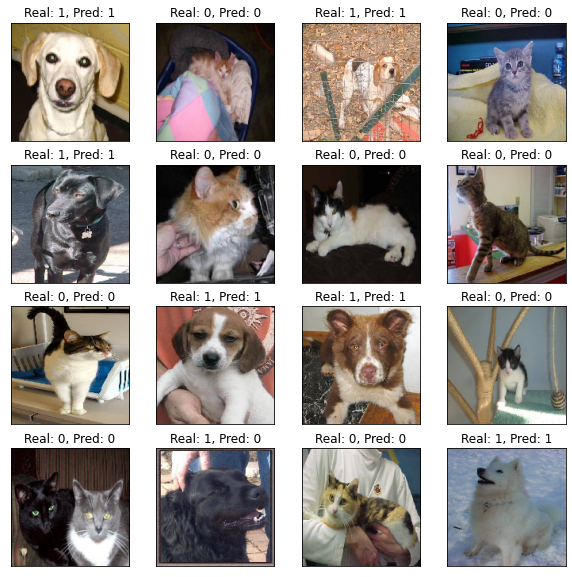

In [118]:
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4,4, i+1)
    plt.title(f"Real: {sample_validation_labels[i]}, Pred: {predicted[i]}")
    plt.xticks([])
    plt.yticks([])
    plt.imshow(sample_validation_images[i])